# Students Data Analysis

This Project was made to deliver insight on student's abilities and how they approach and answer certain tests, also the data provided from this study is meant to be used to calibrate an system for immitating students' behaviours to test an Adaptive learning lms using Computerized Adaptive Testing Algorithms

## Importing Libraries & Files

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
students = pd.read_csv('./Datasets/Final_Scores_EST_To_Upload.csv')

In [3]:
item_bank = pd.read_csv('./Datasets/EST II Biology - March 2022 Working Copy.csv')

## Students Ability Measurements

### EDA

    Deleting Unnecessary Columns

In [4]:
students = students.drop(columns=['Student ID', 'Passport', 'Nationality', 'Other Nationality'])
students.head()

,Admission ID,English Name,F,Grade,EST I total,EST I - Literacy,EST I - Mathematics,EST II - Math 1,EST II - Biology,EST II - Math 2,EST I - Essay
0,202208-006617,Donia Mohamed Abdelhamid Harfoush,F,11.0,1050.0,510.0,540.0,NaN,NaN,NaN,NaN
1,202208-006615,Rawan Walid Emad Abdelfattah,F,12.0,1170.0,520.0,650.0,NaN,NaN,NaN,NaN
2,202208-006614,Mohamed Hossam Mohamed Fathy Abdelmoneim Attia,M,11.0,1230.0,580.0,650.0,NaN,NaN,NaN,NaN
3,202208-006613,Salma Aly Mohamed Mohamed Abdo,F,12.0,1320.0,650.0,670.0,NaN,NaN,NaN,NaN
4,202208-006609,Farah Mohamed Elsayed Elsheribni Elsheribni,F,11.0,1040.0,540.0,500.0,NaN,NaN,NaN,NaN


    Renaming Columns

In [5]:
students.columns = ['id', 'name', 'gender', 'grade', 'total_marks', 'literacy', 'mathematics','math1', 'biology', 'math2', 'essay']

    Deleting non existant total grades

In [6]:
students = students[students['total_marks'].notna()]

    Transforming Grades to Percentages

In [7]:
def transform_to_percentage():
    students['percentage_total_marks'] = students['total_marks'].apply(lambda x: (x*100) / 1580)

transform_to_percentage()

### Classifying students based on abilities

In [8]:
def classify_ability(total_mark):
    
    if total_mark <= 45:
        return str('level 1')

    if 45 < total_mark < 60:
        return str('level 2')
    
    if 60<= total_mark < 70:
        return str('level 3')

    if 70 <= total_mark < 80:
        return str('level 4')

    if 80 <= total_mark < 85:
        return str('level 5')

    if 85 <= total_mark < 90:
        return str('level 6')

    if 90 <= total_mark < 95:
        return str('level 7')

    if 95 <= total_mark < 100:
        return str('level 8')

    Initializing new abilities column

In [9]:
def probability_measurement():
   students['ability'] = students['percentage_total_marks'].apply(lambda x: classify_ability(x))

probability_measurement()

students.head()

,id,name,gender,grade,total_marks,literacy,mathematics,math1,biology,math2,essay,percentage_total_marks,ability
0,202208-006617,Donia Mohamed Abdelhamid Harfoush,F,11.0,1050.0,510.0,540.0,NaN,NaN,NaN,NaN,66.455696,level 3
1,202208-006615,Rawan Walid Emad Abdelfattah,F,12.0,1170.0,520.0,650.0,NaN,NaN,NaN,NaN,74.050633,level 4
2,202208-006614,Mohamed Hossam Mohamed Fathy Abdelmoneim Attia,M,11.0,1230.0,580.0,650.0,NaN,NaN,NaN,NaN,77.848101,level 4
3,202208-006613,Salma Aly Mohamed Mohamed Abdo,F,12.0,1320.0,650.0,670.0,NaN,NaN,NaN,NaN,83.544304,level 5
4,202208-006609,Farah Mohamed Elsayed Elsheribni Elsheribni,F,11.0,1040.0,540.0,500.0,NaN,NaN,NaN,NaN,65.822785,level 3


    Calculacting values count for each ability

In [10]:
students_count_per_ability = students['ability'].value_counts()

In [11]:
students_count_per_ability

level 3    1613
level 2    1342
level 4     807
level 5     210
level 6      85
level 7      26
level 1       3
level 8       2
Name: ability, dtype: int64

    Calculating each ability value appearance in percentages

In [12]:
def ability_percentage(students_count_per_ability):
    percentages = []

    for index in students_count_per_ability.index.sort_values(ascending=True):
        percentages.append(students_count_per_ability[index] * 100 / students_count_per_ability.sum())

    return percentages

ability_percentage(students_count_per_ability)

[0.07338551859099804,
 32.827788649706456,
 39.456947162426616,
 19.740704500978474,
 5.136986301369863,
 2.079256360078278,
 0.6360078277886497,
 0.04892367906066536]

### Visualization

    Printing students' marks plot to number of students

<AxesSubplot:xlabel='percentage_total_marks', ylabel='Count'>

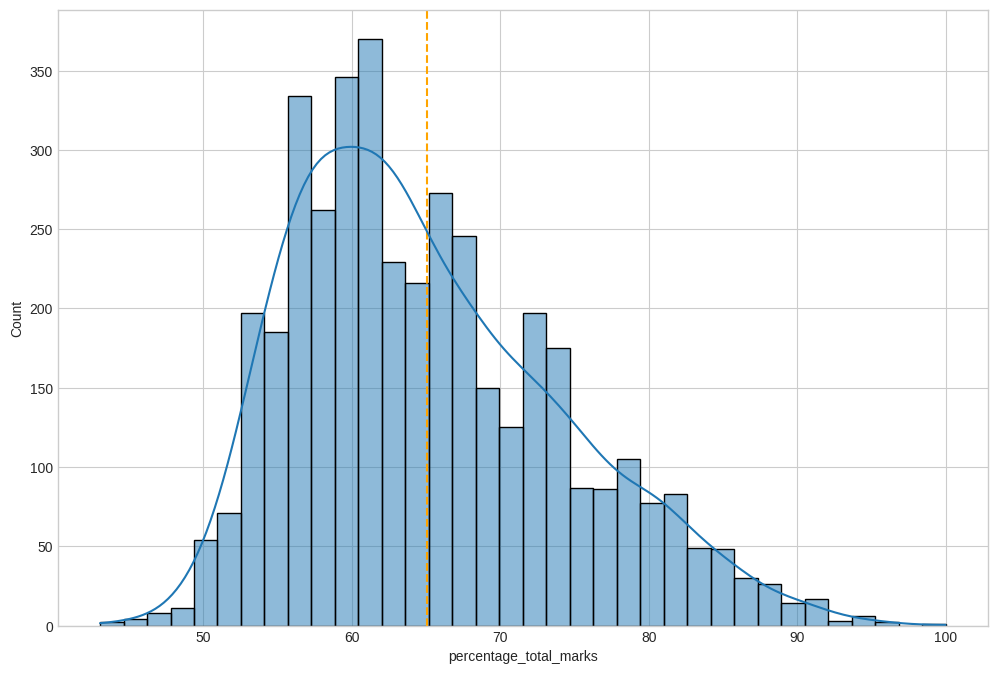

In [13]:
percentage_total_marks = students['percentage_total_marks'].describe()

plt.style.use('seaborn-whitegrid')

plt.subplots(figsize = (12, 8))

plt.axvline(x = percentage_total_marks['mean'], linestyle='--', color='orange',label='Test results mean')

sns.histplot(x = students['percentage_total_marks'] ,kde = True)

    Abilities distribution percentages to students

<AxesSubplot:>

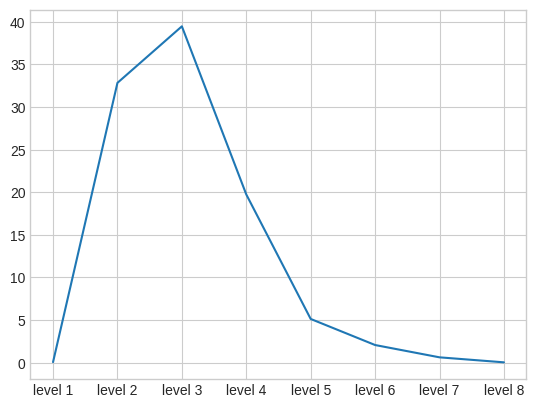

In [14]:
sns.lineplot(x=students['ability'].value_counts().index.sort_values(ascending=True), y=ability_percentage(students_count_per_ability))

## Item Bank Analysis

In [15]:
item_bank.head()

,FIRSTNAME,SURNAME,USERNAME,STUDENT_TOTAL_SCORE,ASSESSMENT_MAX_SCORE,ASSESSMENT_STARTED,ASSESSMENT_ENDED,ITEM_1_SCORE,ITEM_1_MAX_SCORE,ITEM_2_SCORE,...,ITEM_76_SCORE,ITEM_76_MAX_SCORE,ITEM_77_SCORE,ITEM_77_MAX_SCORE,ITEM_78_SCORE,ITEM_78_MAX_SCORE,ITEM_79_SCORE,ITEM_79_MAX_SCORE,ITEM_80_SCORE,ITEM_80_MAX_SCORE
0,Begad,Yasser Abdelrehim Hassan,dupes@live.com,37,80,2022-03-26T08:02:38Z,2022-03-26T09:04:47Z,0.0,1,1.0,...,0.0,1,0.0,1,1.0,1,1.0,1,0.0,1
1,Sofian,Mohamed Fahmi Mohamed Mohamed Fayed,sofiianfayed@gmail.com,20,80,2022-03-26T08:04:04Z,2022-03-26T09:04:46Z,1.0,1,0.0,...,1.0,1,0.0,1,0.0,1,0.0,1,0.0,1
2,Youssef,Walid Ragab Mohamed Ragab,walidbhit@hotmail.com,34,80,2022-03-26T08:07:18Z,2022-03-26T09:08:40Z,1.0,1,1.0,...,1.0,1,0.0,1,0.0,1,0.0,1,1.0,1
3,Youssef,Sherif Youssef Owida Hassan,youssefowida04@gmail.com,33,80,2022-03-26T08:12:27Z,2022-03-26T09:13:28Z,0.0,1,1.0,...,1.0,1,0.0,1,1.0,1,0.0,1,1.0,1
4,Rouaa,Hamdi Abdalla Ali,hamdyroaa1@gmail.com,28,80,2022-03-26T08:01:58Z,2022-03-26T09:04:23Z,1.0,1,0.0,...,0.0,1,0.0,1,0.0,1,0.0,1,1.0,1


### EDA

    Filtering Max Score Columns since scores are always 0s and 1s

In [16]:
item_bank = item_bank[item_bank.columns.drop(list(item_bank.filter(regex=r'ITEM_[1-9][0-9]?_MAX_SCORE')))]

    Cleaning Time related columns

In [17]:
item_bank['ASSESSMENT_STARTED'] = item_bank["ASSESSMENT_STARTED"].str[11:]
item_bank['ASSESSMENT_ENDED'] = item_bank["ASSESSMENT_ENDED"].str[11:]
item_bank["ASSESSMENT_STARTED"] = item_bank["ASSESSMENT_STARTED"].str.replace("Z","")
item_bank["ASSESSMENT_ENDED"] = item_bank["ASSESSMENT_ENDED"].str.replace("Z","")

    All Columns names to be lower cases

In [18]:
item_bank.columns = map(str.lower, item_bank.columns)
item_bank = item_bank.sort_values(by = 'student_total_score')
item_bank.head()

,firstname,surname,username,student_total_score,assessment_max_score,assessment_started,assessment_ended,item_1_score,item_2_score,item_3_score,...,item_71_score,item_72_score,item_73_score,item_74_score,item_75_score,item_76_score,item_77_score,item_78_score,item_79_score,item_80_score
1082,Nanci,Ahmed Mohamed Sameh,nancisameh@gmail.com,7,80,08:01:15,08:46:00,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
591,Mohamed,Fady Abdou El Basyouni,manobeatbox44@gmail.com,7,80,08:03:29,08:35:08,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1499,Bavly,Awad Faragallah Rizkalla,bavlyawadfarag@gmail.com,8,80,08:01:16,08:33:44,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
363,Malek,Sobhe Abdul Diam,maleksobhe91@gmail.com,9,80,08:01:50,08:31:02,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
326,Hady,Wadie Samy,hadywadie2021@gmail.com,9,80,08:00:35,09:02:01,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


    Assigning Abilities

In [19]:
def assign_student_ability(student_total_score: int):
    
    if student_total_score <= 20:
        return 'Ability 1'
    
    elif 20 < student_total_score < 50:
        return 'Ability 2'

    elif 50 <= student_total_score < 70:
        return 'Ability 3'
    
    elif 70 <= student_total_score < 85:
        return 'Ability 4'

    elif 85 <= student_total_score < 95:
        return 'Ability 5'        

    else:
        return 'Ability 6'

item_bank['student_ability'] = item_bank['student_total_score'].apply(lambda student_total_score: assign_student_ability(student_total_score))


### Items Analysis

    Each question's mean visualization

0.43852908891328213


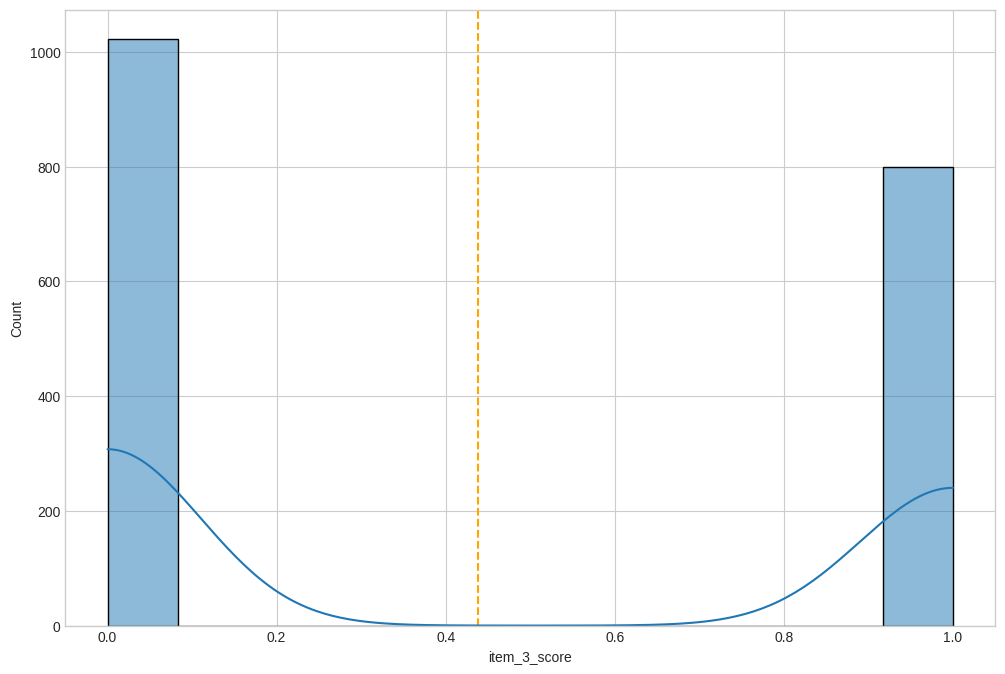

In [20]:
item_3_score = item_bank['item_3_score'].describe()

plt.style.use('seaborn-whitegrid')

plt.subplots(figsize = (12, 8))

plt.axvline(x = item_3_score['mean'], linestyle='--', color='orange',label='Test results mean')

sns.histplot(x = item_bank['item_3_score'] ,kde = True)

print(item_3_score['mean'])

    Filtering questions with lower success rates for students

In [21]:
items_mean_list =[]
def check_items_mean(item):
    item_score = item_bank[item].describe()
    x = item_score['mean']

    if x <0.2:
        items_mean_list.append(item)
        items_mean_list.append(x)
        # print (item ,x)
    else:
        return

for x in range(1, 80):
    item = 'item_{}_score'.format(x)
    check_items_mean(item)

print(items_mean_list)

['item_24_score', 0.11281489594742607, 'item_42_score', 0.1630971993410214, 'item_43_score', 0.17233809001097694, 'item_44_score', 0.18221734357848518, 'item_53_score', 0.16657534246575342, 'item_58_score', 0.16666666666666666, 'item_61_score', 0.13995609220636662, 'item_62_score', 0.18166849615806804, 'item_63_score', 0.18815139879319803, 'item_68_score', 0.11800219538968167, 'item_69_score', 0.12390350877192982, 'item_70_score', 0.19319429198682767, 'item_74_score', 0.16383561643835617, 'item_77_score', 0.17097306212204508]


    Visualizating Result

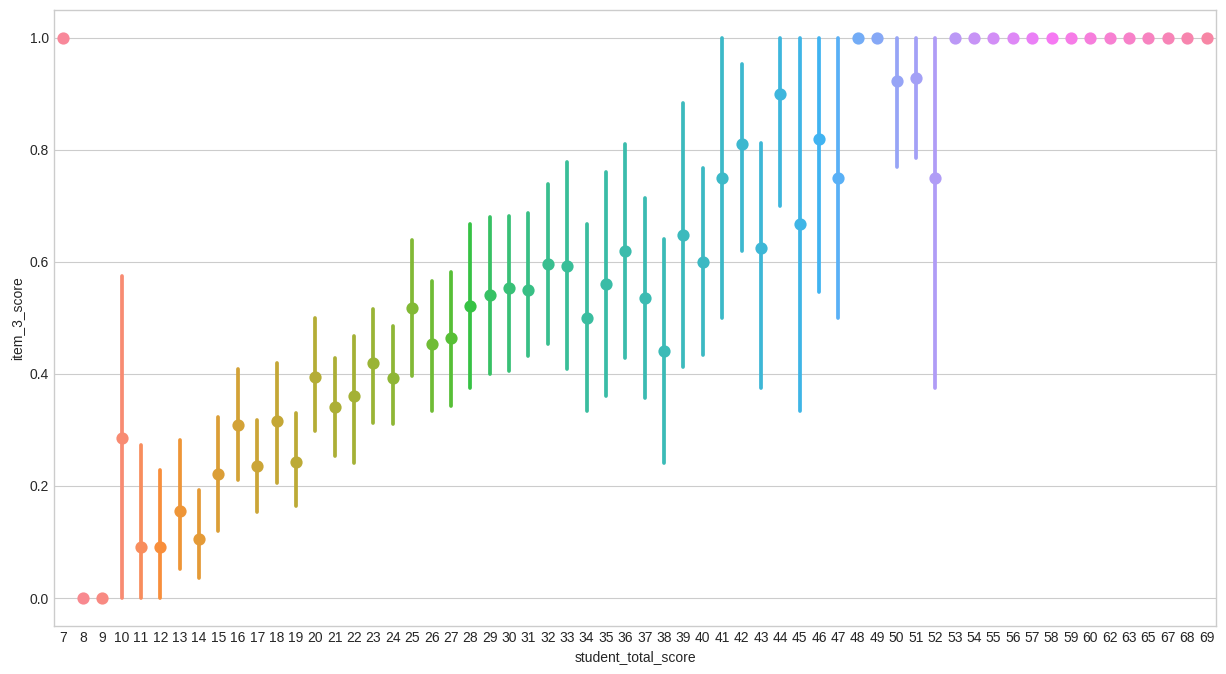

In [22]:
plt.figure(figsize=(15, 8))

sns.pointplot(data=item_bank, x='student_total_score', y='item_3_score',hue='student_total_score')
plt.legend('', ncol=6, loc='upper left')

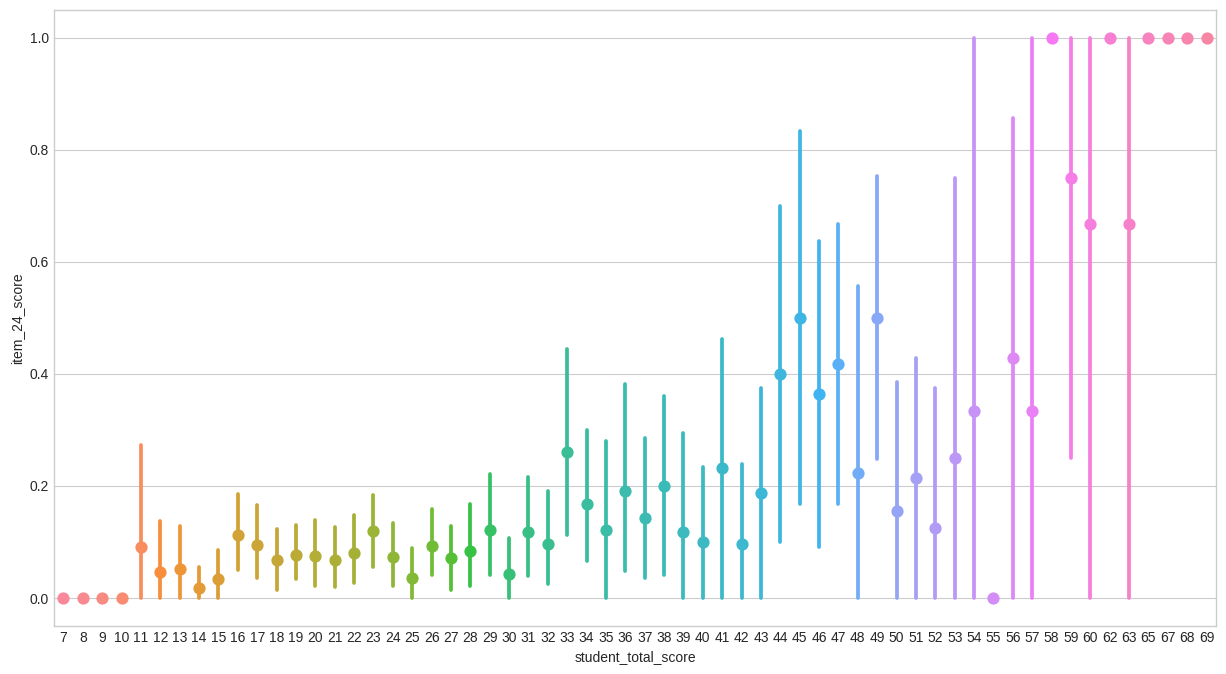

In [23]:
plt.figure(figsize=(15, 8))

sns.pointplot(data=item_bank, x='student_total_score', y='item_24_score',hue='student_total_score')
plt.legend('', ncol=6, loc='upper left')

<AxesSubplot:xlabel='student_total_score', ylabel='item_3_score'>

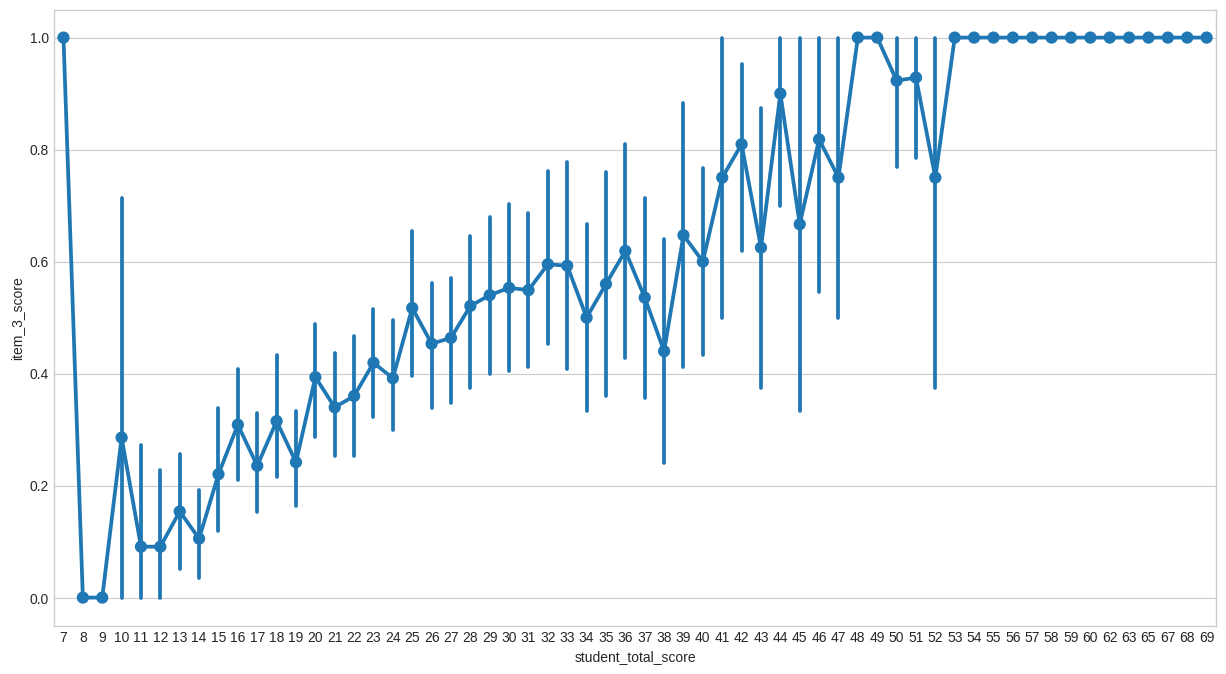

In [25]:
plt.figure(figsize=(15, 8))

sns.pointplot(data=item_bank, x='student_total_score', y='item_3_score')

<AxesSubplot:xlabel='student_total_score', ylabel='item_3_score'>

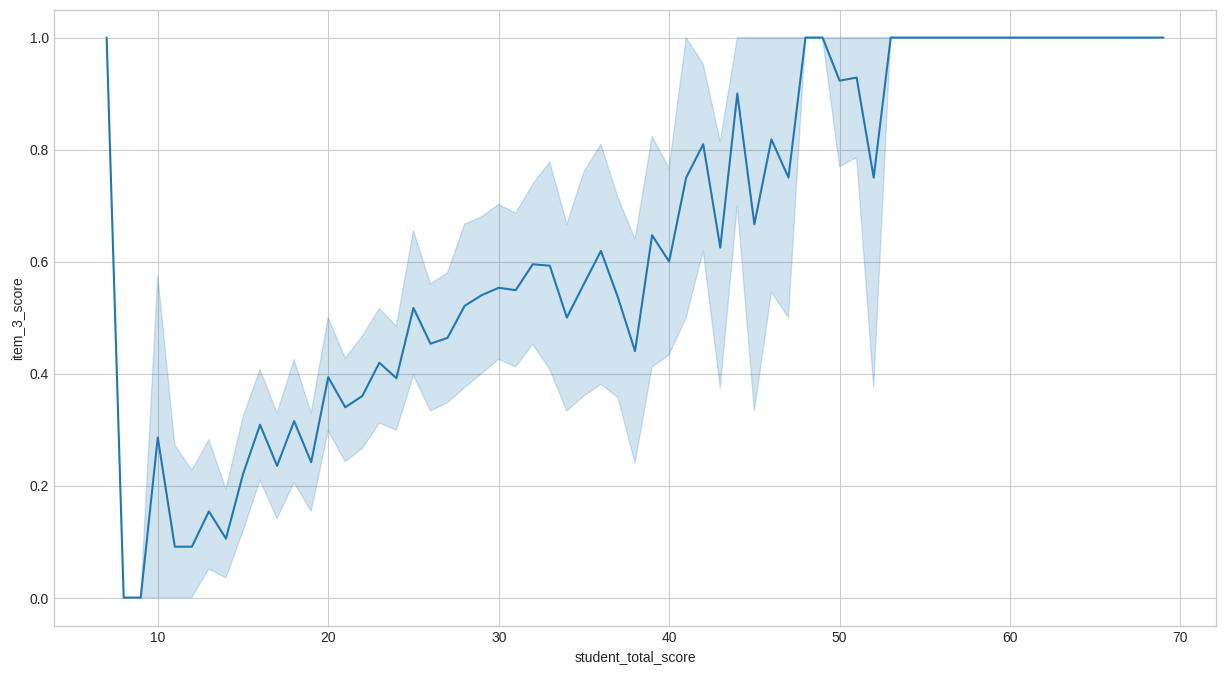

In [28]:
plt.figure(figsize=(15, 8))

sns.lineplot(data=item_bank, x='student_total_score', y='item_3_score')